# Feature engineering

feature engineering is one of the crucial parts of the building a good machine learning model. IF we have useful feature, the model will perform better. We must keep in mind that feature engineering is something that is done in best possible manner only when you have some knowledge about the domain of the problem and depends a lot on the data concern . However , there are some techniques that we can try to create features from almost all kinds of numerical and categorical variables. **feature engineering is not about creating new features from data but also includes different types of normalization and transformations.**

Let's start with the most simple but most widely used feature engineering techniques. Let's say you are dealing with **data and time data** . So, we have a pandas dataframe with a datetime type column. Using this column, we can create features like:

- Year
- Week of Year
- Month
- Day of Week
- Weekend
- Hour
- And many more

and this can be done using pandas very easily


In [ ]:
df.loc[:,'year'] = df['datetime_column'].dt.year 
df.loc[:,'weekofyear'] = df['datetime_column'].dt.weekofyear
df.loc[:, 'month'] = df['datetime_column'].dt.month
df.loc[:, 'dayofweek'] = df['datetime_column'].dt.dayofweek
df.loc[: , 'weekend'] = (df[df.datetime_column.dt.weekday >= 5]).astype(int)

So, we are creating a bunch of new columns using the datetime column. Let's see some of the sample feature that can be created.

In [ ]:
import pandas as pd 

# create a series of datetime wiht a frequency of 10 hours

s = pd.date_range('2020-01-06' , '2020-01-06', freq = '10H')

#  creating some feature based on datatime

feature = {
    'dayofweek': s.dt.dayofweek.values,
    'dayofyear': s.dt.dayofyear.values,
    'hour' : s.dt.hour.values,
    'is_leap_year' : s.dt.is_leap_year.values,
    'quarter': s.dt.quarter.values,
    'weekofyear': s.dt.weekofyear.values

}

This will generate a dictionary of features from a given series. you can apply this to any datetime column in a pandas dataframe . these are some of the many date time feature that pandas offer..

For example , predicting sales of a store..
we can easily extract feature like the year, month , quater, etc from the datetime column. Then we have *customer_id* column which might have multiple entries , so a customer is seen many times. and each date and customer id will have a bunch of categorical and numerical data . There are bunch of features we can create from it:

- what is the month a customer is most active in
- what is the count of cat1 , cat1, cat3 for a customer
- what is the count of cat1 , cat2 , cat3 for a customer for a given week of the year
- what is the mean of num1 for a given customer
- And so on.

Using aggregates in pandas , it is quite easy to create features like these. let's see

In [ ]:
def generate_features(df):
    # create a bunch of features using the date column
    df.loc[:, 'year'] = df['date'].dt.year
    .
    . 
    # and so on
    
    # create an aggregate dictionary
    aggs = {}
    # for aggregation by month , we calculate the number of unique month values and also the mean
    aggs['month'] = ['nunique' , 'mean']
    aggs['weekofyear'] = ['nunique' , 'mean']
    # we aggregate by num1 and calculate sum , max, min, and mean values of this column
    aggs['num1'] = ['sum' , 'max' , 'min', 'mean']
    # for customer id we calculate the total count
    aggs['customer_id'] = ['size']
    # again for customer_id , we calculate the total unique
    aggs['customer_id'] = ['nunique']

    # we group by customer_id and calculate the aggregates
    agg_df = df.groupby('customer_id').agg(aggs)
    agg_df = agg_df.reset_index()
    return agg_df

After aggregating the data we can join them this dataframe with the original dataframe with *customer_id* column

Sometimes , for example, when dealing with time-series problems, you might have features which are not individual values but a list of values. for example, transactions by a customer in a given period of time. In this case, we create different types of features such as : which numerical features, when you are grouping on a categorical column, you will get features like a list of values which are time distributed. In these cases, you can create a bunch of statistical featu such as :

- Mean
- Max
- Min
- Unique
- Skew
- Kurtosis
- Kstat
- Percentile
- Quantile
- Peak to Peak
- And many more

These can be created using simple numpy functions , as shown in the below

In [ ]:
import numpy as np 

feature_dict = {}

# calculate mean
feature_dict['mean'] = np.mean(x)
# calculate max
feature_dict['max'] = np.max(x)
# calculate min
feature_dict['min'] = np.min(x)
# calculate std
feature_dict['std'] = np.std(x)
# calculate variance
feature_dict['var'] = np.var(x)
# calculate peak to peak
feature_dict['ptp'] = np.ptp(x)
# percentile feautres
feature_dict['percentile_10'] = np.percentile(x ,10)
feature_dict['percentile_60'] = np.percentile(x , 60)
feature_dict['percentile_90'] = np.percentile(x, 90)

# quantile feature
feature_dict['quantile_5'] = np.percentile(x, 5)
feature_dict['quantile_95'] = np.percentile(x, 95)
feature_dict['quantile_99'] = np.percentile(x , 99)

The **time series data** (list of value) can be converted to a lot of features.

A python library called *tsfresh* is instrumental in this case

In [ ]:
from tsfresh.feature_extraction import feature_calculators as fc 

# tsfresh based features
feature_dict['abs_energy'] = fc.abs_energy(x)
feature_dict['count_above_mean'] = fc.count_above_mean(x)
feature_dict['count_below_mean'] = fc.count_below_mean(x)
feature_dict['mean_abs_change'] = fc.mean_abs_change(x)
feature_dict['mean_change'] = fc.mean_change(x)

This is not all; *tsfresh* offers hundreds of features and tens of variations of different features that you can use for time series (list of values) based features. In the example above, x is a list of values. But thats not all. there are many others features that can be create for numerical data with or without categorical data. A simple way to generate many features is just to create a bunch of **polynomial features.** for example , a second-degree polynomial feature from two features "a" and "b" would include: "a" , "b", "ab", $"a^2"$ and $"b^2"$.

In [1]:
import numpy as np 
import pandas as pd 

# generate a random dataframe with 2 columns and 100 rows
df = pd.DataFrame(
    np.random.rand(100 , 2),
    columns=[f"f_{i}" for i in range(1, 3)]
)
df.head()

,f_1,f_2
0,0.105883,0.890724
1,0.934053,0.608714
2,0.329370,0.990669
3,0.656689,0.192124
4,0.695451,0.569823


Now we can create two-degree polynomial features using PolynomialFeatures from scikit-learn.

In [7]:
from sklearn import preprocessing

# initializing polynomial features class object for two-degree polynomial features

pf = preprocessing.PolynomialFeatures(
    degree = 2,
    interaction_only = False,
    include_bias = False
)
# fit to the features
pf.fit(df)

poly_feats = pf.transform(df)

# create a datafrae with all the features
num_feats = poly_feats.shape[1]
df_transformed = pd.DataFrame(
    poly_feats,
    columns = [f"f_{i}" for i in range(1 , num_feats +1)]
)

df_transformed.head()


,f_1,f_2,f_3,f_4,f_5
0,0.105883,0.890724,0.011211,0.094312,0.793390
1,0.934053,0.608714,0.872455,0.568571,0.370533
2,0.329370,0.990669,0.108485,0.326297,0.981425
3,0.656689,0.192124,0.431240,0.126166,0.036912
4,0.695451,0.569823,0.483653,0.396284,0.324699


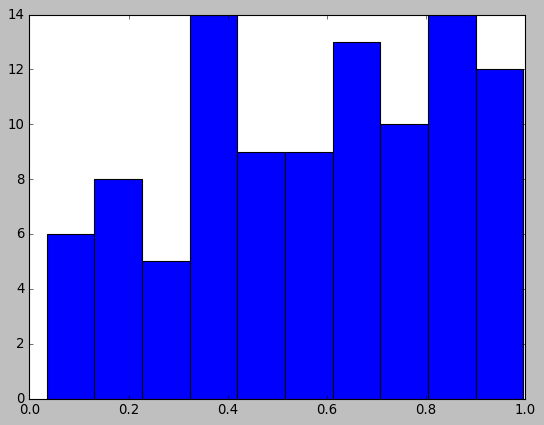

In [10]:
import matplotlib.pyplot as plt 
from matplotlib import style
style.use('classic')

plt.hist(df['f_1'])
plt.show()

Another interesting feature converts the numbers to categories. it's know as **binning**. let's look at the above figure a sample histogram of a random numerical feature. We use ten bins for this figure, and we see that we can divide the data into ten parts. This can be accomplished using pandas *cut* function.

In [12]:
# create bins of the numerical columns 10 bins

df['f_bin_10'] = pd.cut(df["f_1"], bins=10, labels= False)
df['f_bin_100'] = pd.cut(df['f_1'], bins=100, labels= False)
df.head()

,f_1,f_2,f_bin_10,f_bin_100
0,0.105883,0.890724,0,7
1,0.934053,0.608714,9,93
2,0.329370,0.990669,3,30
3,0.656689,0.192124,6,64
4,0.695451,0.569823,6,68


when you bin, you can use both the bin and the original feature. 
Another interesting type of feature that we can create from numerical features is log transformation. Take a look

In [21]:
df['f_3'] = df['f_1'].apply(lambda x : np.log(x))
df.head()

,f_1,f_2,f_bin_10,f_bin_100,f_3
0,0.105883,0.890724,0,7,-2.245423
1,0.934053,0.608714,9,93,-0.068222
2,0.329370,0.990669,3,30,-1.110573
3,0.656689,0.192124,6,64,-0.420545
4,0.695451,0.569823,6,68,-0.363194


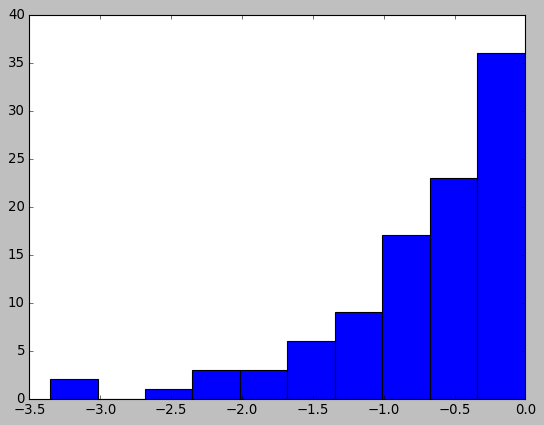

In [22]:
style.use('classic')
plt.hist(df['f_3'])
plt.show()

*f_3* is a special feature with a very high variance. Compared to other features that have a low variance (let's assume that). Thus, we would want to reduce the variance of this column, and that can be done by taking a log transformation

Sometimes, instead of log, you can also take exponential. A vary interesting case is when you use a log-based evaluation metric, for example, RMSLE. In that case, you can train on log-transformed targets and convert back to original using exponential on the prediction. That would help optimize the model for the metric. Most of the time , these kinds of numerical features are created based on intuition. There is no formula. If you are working in an industry , you will create your industry-specific features.

When dealing with both categorical and numerical variables , you might encounter missing values. 
For categorical features, let's keep it super simple .*If you ever encounter missing values in categorical features,treat is as a new category!* it almost always works!

One way to fill missing values in numerical data would be to choose a value that does not appear in the specific feature and fill using that. For example , let's say 0 is not seen in the feature. So, we fill all the missing value using 0. This is one of the ways but might not be the most effective. One of the methods that works better than filling 0s for numerical data is to fill with mean instead. You can fill with the median ,  most common values as well.
A fancy way of filling in the missing values would be to use a **k-nearest neighbour** method. you can select a sample with missing values and find the nearest neighbour utiliseing some kind of distance metric, for example, euclidean distance. Then you can take the mean of all nearest neighbour and fill up the missing value. 
You can use the KNN imputer implementation for filling missing values

In [3]:
# KNNImputer
import numpy as np 
from sklearn import impute

#create a random numpy array with 10 samples and 6 features and values ranging from 1 to 15
x = np.random.randint(1 , 15 ,(10 , 6))

# convert the array to float
x = x.astype(float)
print('original data\n')
print(x)
# randomly assign 10 element to NaN (missing)

x.ravel()[np.random.choice(x.size , 10 , replace= False)] = np.nan
print('data after nan\n')
print(x)
# use 3 nearest neighbour to fill na values
knn_imputer = impute.KNNImputer(n_neighbors= 2)
x = knn_imputer.fit_transform(x)
print('data after imputation\n')
print(x)

original data

[[11. 12.  1. 13.  6.  8.]
 [ 5.  1.  2.  8. 10.  2.]
 [ 8. 14.  3.  6.  4.  8.]
 [ 1.  5. 12.  7. 10.  8.]
 [12.  2. 11.  6. 11.  1.]
 [ 7. 11.  6. 14.  5. 13.]
 [14. 12. 12.  4. 11.  8.]
 [ 8.  3.  1. 12.  3.  1.]
 [ 7.  2. 13. 14. 10.  5.]
 [ 9.  9. 13.  3. 12.  5.]]
data after nan

[[11. 12.  1. 13.  6.  8.]
 [ 5.  1.  2. nan 10.  2.]
 [ 8. 14.  3.  6.  4.  8.]
 [ 1.  5. nan  7. nan  8.]
 [nan  2. 11.  6. 11.  1.]
 [ 7. 11. nan nan  5. 13.]
 [14. nan 12.  4. 11.  8.]
 [ 8.  3.  1. 12. nan  1.]
 [ 7. nan 13. 14. nan  5.]
 [ 9.  9. 13.  3. 12.  5.]]
data after imputation

[[11.  12.   1.  13.   6.   8. ]
 [ 5.   1.   2.   9.  10.   2. ]
 [ 8.  14.   3.   6.   4.   8. ]
 [ 1.   5.   6.5  7.  10.5  8. ]
 [11.5  2.  11.   6.  11.   1. ]
 [ 7.  11.   2.   9.5  5.  13. ]
 [14.   5.5 12.   4.  11.   8. ]
 [ 8.   3.   1.  12.   8.   1. ]
 [ 7.   5.5 13.  14.  11.5  5. ]
 [ 9.   9.  13.   3.  12.   5. ]]


*Another way of imputing missing values in a column would be to train a regression model that tries to predict missing values in a column based on other columns.*

The column with missing values will be the **"target"** column and rest will be the **"feature"** column, Train a model on samples for which there is no missing values in the concerned column and then try to predict target (the same column) for the sample that were removed earlier.

**Always remember that imputing values for tree based models is unneccessary as they can handle it themselves.**